In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read sqlite query results into a pandas DataFrame
con = sqlite3.connect("data/wildfire.sqlite")
df = pd.read_sql_query("SELECT * from fires", con)

In [3]:
test = pd.read_sql_query("SELECT name FROM sqlite_schema WHERE type='table' ORDER BY name", con)

In [54]:
test

,name
0,ElementaryGeometries
1,Fires
2,KNN
3,NWCG_UnitIDActive_20170109
4,SpatialIndex
5,geometry_columns
6,geometry_columns_auth
7,geometry_columns_field_infos
8,geometry_columns_statistics
9,geometry_columns_time


In [56]:
knn = pd.read_sql_query("SELECT * from NWCG_UnitIDActive_20170109", con)
knn.columns

Index(['OBJECTID', 'UnitId', 'GeographicArea', 'Gacc', 'WildlandRole',
       'UnitType', 'Department', 'Agency', 'Parent', 'Country', 'State',
       'Code', 'Name'],
      dtype='object')

In [57]:
knn.head()

,OBJECTID,UnitId,GeographicArea,Gacc,WildlandRole,UnitType,Department,Agency,Parent,Country,State,Code,Name
0,1,USAKCAN,AK,USAKACC,Resource Provider Only,Non-Government,NG,ANC,None,US,AK,CAN,Calista Regional Native Corporation
1,2,USAKCEKX,AK,USAKACC,Incident Host Geographic,US County/Local,AK,C&L,None,US,AK,CEKX,Central Emergency Services
2,3,USAKCFFX,AK,USAKACC,Incident Host Geographic,US County/Local,AK,C&L,None,US,AK,CFFX,City Fairbanks Fire Department
3,4,USAKCFMX,AK,USAKACC,Incident Host Geographic,US County/Local,AK,C&L,None,US,AK,CFMX,Central Mat-Su Fire Department
4,5,USAKCFQ,AK,USAKACC,Incident Host Geographic,US Federal,DOD,USAF,None,US,AK,CFQ,Clear Air Force Station


In [4]:
df.shape

(1880465, 39)

In [5]:
df.columns

Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'Shape'],
      dtype='object')

In [6]:
df.isna().sum()

OBJECTID                            0
FOD_ID                              0
FPA_ID                              0
SOURCE_SYSTEM_TYPE                  0
SOURCE_SYSTEM                       0
NWCG_REPORTING_AGENCY               0
NWCG_REPORTING_UNIT_ID              0
NWCG_REPORTING_UNIT_NAME            0
SOURCE_REPORTING_UNIT               0
SOURCE_REPORTING_UNIT_NAME          0
LOCAL_FIRE_REPORT_ID          1459286
LOCAL_INCIDENT_ID              820821
FIRE_CODE                     1555636
FIRE_NAME                      957189
ICS_209_INCIDENT_NUMBER       1854748
ICS_209_NAME                  1854748
MTBS_ID                       1869462
MTBS_FIRE_NAME                1869462
COMPLEX_NAME                  1875282
FIRE_YEAR                           0
DISCOVERY_DATE                      0
DISCOVERY_DOY                       0
DISCOVERY_TIME                 882638
STAT_CAUSE_CODE                     0
STAT_CAUSE_DESCR                    0
CONT_DATE                      891531
CONT_DOY    

In [7]:
df.duplicated().sum()

0

In [52]:
#len(df.OWNER_DESC.unique())
len(df.STATE.unique())

52

In [47]:
df.OWNER_DESCR.unique()

array(['USFS', 'STATE OR PRIVATE', 'MISSING/NOT SPECIFIED',
       'OTHER FEDERAL', 'BIA', 'FWS', 'TRIBAL', 'PRIVATE', 'STATE', 'BLM',
       'NPS', 'BOR', 'FOREIGN', 'MUNICIPAL/LOCAL', 'COUNTY',
       'UNDEFINED FEDERAL'], dtype=object)

In [59]:
df.SOURCE_SYSTEM_TYPE.unique()

array(['FED', 'NONFED', 'INTERAGCY'], dtype=object)

In [12]:
yearly = df.groupby("FIRE_YEAR").count()
yearly.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
FIRE_YEAR,,,,,,,,,,,,,,,,,,,,,
1992,67975,67975,67975,67975,67975,67975,67975,67975,67975,67975,...,67975,67975,67975,67975,67975,67975,33783,33783,33783,67975
1993,61989,61989,61989,61989,61989,61989,61989,61989,61989,61989,...,61989,61989,61989,61989,61989,61989,33992,33992,33992,61989
1994,75955,75955,75955,75955,75955,75955,75955,75955,75955,75955,...,75955,75955,75955,75955,75955,75955,36098,36098,36098,75955
1995,71472,71472,71472,71472,71472,71472,71472,71472,71472,71472,...,71472,71472,71472,71472,71472,71472,40821,40821,40821,71472
1996,75574,75574,75574,75574,75574,75574,75574,75574,75574,75574,...,75574,75574,75574,75574,75574,75574,41502,41502,41502,75574


<Axes: >

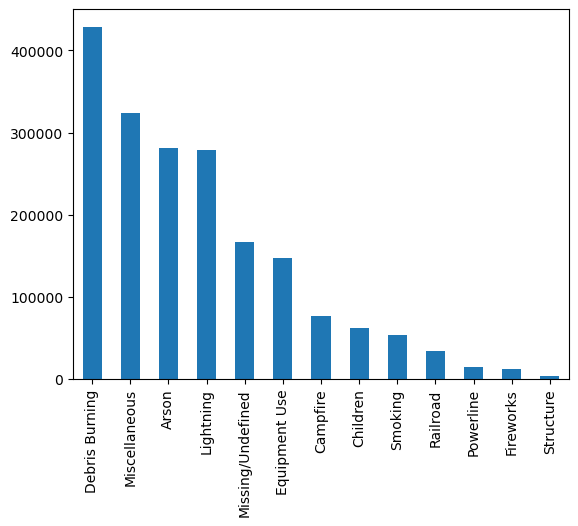

In [13]:
df["STAT_CAUSE_DESCR"].value_counts().plot.bar()

In [5]:
df1 = df[(df["STAT_CAUSE_DESCR"] != "Missing/Undefined") & (df["STAT_CAUSE_DESCR"] != "Miscellaneous")]

In [60]:
df1.shape

(1389937, 39)

<Axes: >

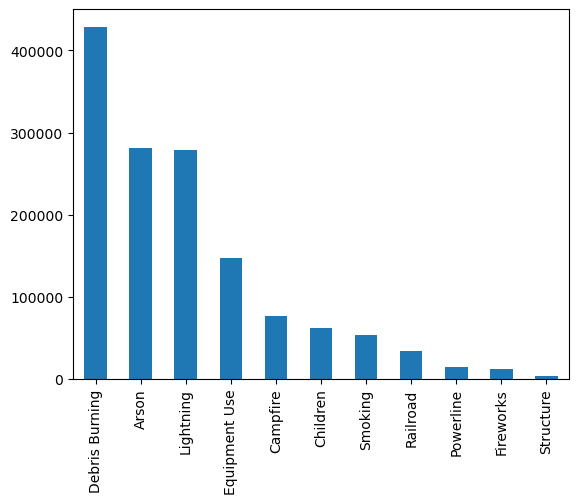

In [6]:
other_causes = df1["STAT_CAUSE_DESCR"].value_counts()
other_causes.plot.bar()

In [21]:
from sklearn.model_selection import train_test_split
xVal=df1.loc[:,df1.columns != 'STAT_CAUSE_DESCR']
yVal=df1['STAT_CAUSE_DESCR']

#Training and test set split
xTrain,xTest,yTrain,yTest=train_test_split(xVal,yVal,\
                           test_size=0.1,random_state =441)

In [9]:
df1.STAT_CAUSE_DESCR.unique()

array(['Lightning', 'Debris Burning', 'Campfire', 'Equipment Use',
       'Arson', 'Children', 'Railroad', 'Smoking', 'Powerline',
       'Structure', 'Fireworks'], dtype=object)

In [22]:
counts = yTrain.value_counts()
counts

Debris Burning    386152
Arson             253049
Lightning         250872
Equipment Use     132795
Campfire           68602
Children           55060
Smoking            47558
Railroad           30080
Powerline          12979
Fireworks          10373
Structure           3423
Name: STAT_CAUSE_DESCR, dtype: int64

In [23]:
from imblearn.over_sampling import RandomOverSampler

#Perform undersampling
OverSampleRatio = {
    'Lightning' : counts['Lightning'], 'Debris Burning' : counts['Debris Burning'], 'Campfire' : counts['Campfire'], 'Equipment Use' : counts['Equipment Use'],
       'Arson' : counts['Arson'], 'Children' : counts['Children'], 'Railroad' : counts['Railroad'], 'Smoking' : counts['Smoking'], 'Powerline' : counts['Powerline'],
       'Fireworks' : counts['Fireworks'], 'Structure' : 10000
}

newSampStrat=RandomOverSampler(sampling_strategy=OverSampleRatio,random_state=441) #Goal balance all classes
xTrain,yTrain=newSampStrat.fit_resample(xTrain,yTrain) #perform the balancing newX and newY are balanced X and y
yTrain.value_counts()  #print result showing the nunmber of observation in each class

Debris Burning    386152
Arson             253049
Lightning         250872
Equipment Use     132795
Campfire           68602
Children           55060
Smoking            47558
Railroad           30080
Powerline          12979
Fireworks          10373
Structure          10000
Name: STAT_CAUSE_DESCR, dtype: int64

In [ ]:
counts = yTrain.value_counts()
counts

In [25]:
from imblearn.under_sampling import RandomUnderSampler
# UnderSampleRatio = {
#     'Lightning' : counts['Lightning'], 'Debris Burning' : counts['Debris Burning'], 'Campfire' : counts['Campfire'], 'Equipment Use' : counts['Equipment Use'],
#        'Arson' : counts['Arson'], 'Children' : counts['Children'], 'Railroad' : counts['Railroad'], 'Smoking' : counts['Smoking'], 'Powerline' : counts['Powerline'],
#        'Structure' : counts['Structure'], 'Fireworks' : 10000
# }

newSampStrat=RandomUnderSampler(sampling_strategy='not minority',random_state=441) #Goal balance all classes
xTrain,yTrain=newSampStrat.fit_resample(xTrain,yTrain) #perform the balancing newX and newY are balanced X and y
yTrain.value_counts() 

Arson             10000
Campfire          10000
Children          10000
Debris Burning    10000
Equipment Use     10000
Fireworks         10000
Lightning         10000
Powerline         10000
Railroad          10000
Smoking           10000
Structure         10000
Name: STAT_CAUSE_DESCR, dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_2388\4224800094.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.STAT_CAUSE_DESCR = df1.STAT_CAUSE_DESCR.replace({"Children" : "Other",


<Axes: >

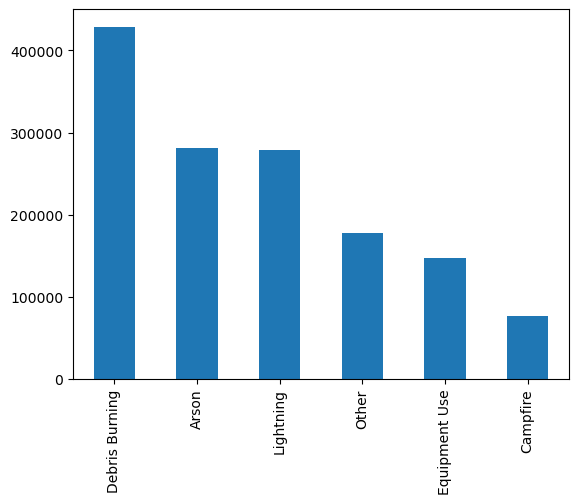

In [32]:
# Map bottom 6 classes to "Other"
df1.STAT_CAUSE_DESCR = df1.STAT_CAUSE_DESCR.replace({"Children" : "Other",
                                                 "Smoking" : "Other",
                                                 "Railroad" : "Other",
                                                 "Powerline" : "Other",
                                                 "Fireworks" : "Other",
                                                 "Structure" : "Other"})
df1["STAT_CAUSE_DESCR"].value_counts().plot.bar()